In [1]:
import pandas as pd
import numpy as np

#Importing libraries for Data-visualizations
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC # Importing SVM

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.preprocessing import LabelEncoder # One-Hot Encoding
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv("SalaryData_Train.csv")

In [4]:
df_train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_train.shape

(30161, 14)

In [6]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [7]:
df_test=pd.read_csv("SalaryData_Test.csv")

In [8]:
df_test.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
df_test.shape

(15060, 14)

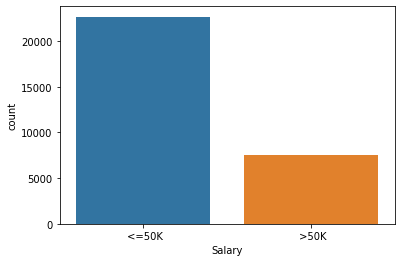

In [10]:
# Countplot for Salary in train dataset

sns.countplot(df_train.Salary);

In [11]:
# One-Hot Encoding

le=LabelEncoder()
df_train['Salary']=le.fit_transform(df_train['Salary'])
df_test['Salary']=le.fit_transform(df_test['Salary'])

In [12]:
df1_train=pd.get_dummies(df_train)
df1_test=pd.get_dummies(df_test)

In [13]:
df1_train.shape

(30161, 103)

In [14]:
df1_test.shape

(15060, 103)

In [15]:
x_train=df1_train.drop(['Salary'],axis=1)
x_test=df1_test.drop(['Salary'],axis=1)
y_train=df1_train['Salary']
y_test=df1_test['Salary']

In [16]:
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (30161, 102)
Shape of x_test (15060, 102)
Shape of y_train (30161,)
Shape of y_test (15060,)


In [17]:
model=SVC()

In [19]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("The accuracy score is:",accuracy_score(y_test,y_pred))
result1=classification_report(y_test,y_pred)
print("\nClassification Report\n",result1)

The accuracy score is: 0.7964143426294821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



In [20]:
print("Confusion Matrix is:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix is:
 [[10997   363]
 [ 2703   997]]
